# Project 4

# 13 dec 2024

# SMS Spam Detection

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("smsspamcollection.tsv",sep="\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.sample(5) # randomly 5 rows

,label,message,length,punct
675,ham,"I've got &lt;#&gt; , any way I could pick up?",46,8
5240,ham,"Gud gud..k, chikku tke care.. sleep well gud nyt",48,5
4871,ham,Dip's cell dead. So i m coming with him. U bet...,82,4
1912,ham,Lol grr my mom is taking forever with my presc...,92,3
1713,ham,o turns out i had stereo love on mi phone unde...,66,1


In [4]:
df.shape

(5572, 4)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement depending on evaluation
# 7. website

# 1. Data Cleaning

In [6]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [8]:
df1 = df.drop(columns=['length', 'punct'])

In [9]:
df1.sample(5)

,label,message
3660,ham,Wait.i will come out.. &lt;#&gt; min:)
4956,ham,Doing my masters. When will you buy a bb cos i...
827,ham,Hahaha..use your brain dear
5497,spam,"SMS SERVICES. for your inclusive text credits,..."
2364,spam,Fantasy Football is back on your TV. Go to Sky...


In [10]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
encoder.fit_transform(df1['label'])

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
df1['label'] = encoder.fit_transform(df1['label'])

In [13]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# checking duplicates and 
df1.isnull().sum()

label      0
message    0
dtype: int64

In [15]:
df1.duplicated().sum()

403

In [16]:
# removing duplicates
df1.drop_duplicates(keep='first',inplace=True)
df1

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
df1.duplicated().sum()

0

In [18]:
df1.shape

(5169, 2)

# 2. EDA

In [19]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df1['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

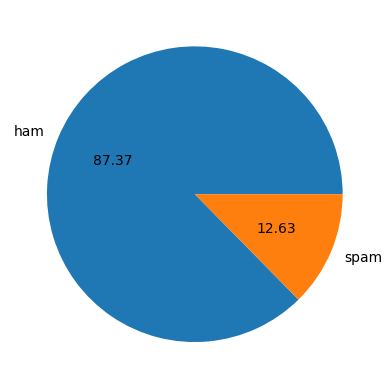

In [21]:
import matplotlib.pyplot as plt
plt.pie(df1['label'].value_counts(), labels=['ham','spam'], autopct = "%0.2f")
plt.show()
# autopct parameter in pie() allows you to format the percentage labels that appear on the pie

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df1['message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: message, Length: 5169, dtype: int64

In [26]:
df1['num_characters']=df['message'].apply(len)

In [27]:
df1

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [28]:
# Number of words
df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: message, Length: 5169, dtype: int64

In [29]:
df1['num_words'] = df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df1.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df1['message'].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568               [Will ü b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: message, Length: 5169, dtype: object

In [32]:
df1['num_sentences'] = df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df1[['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,18.593538,79.344941,1.974076
std,13.402779,58.439256,1.458967
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,61.000000,1.000000
75%,26.000000,119.000000,2.000000
max,220.000000,910.000000,38.000000


In [34]:
# ham
df1[df1['label']==0][['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,17.267715,70.906333,1.827724
std,13.588065,56.717234,1.394338
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,53.000000,1.000000
75%,22.000000,91.000000,2.000000
max,220.000000,910.000000,38.000000


In [35]:
# spam
df1[df1['label']==1][['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,653.000000,653.000000,653.000000
mean,27.762634,137.704441,2.986217
std,6.993008,29.821348,1.494815
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,148.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,223.000000,9.000000


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

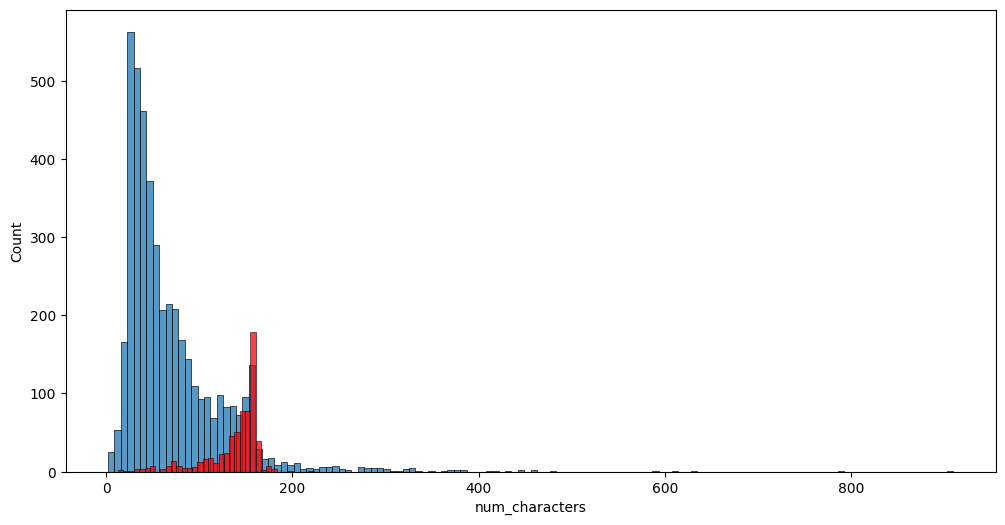

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label'] == 0]['num_characters'])
sns.histplot(df1[df1['label'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

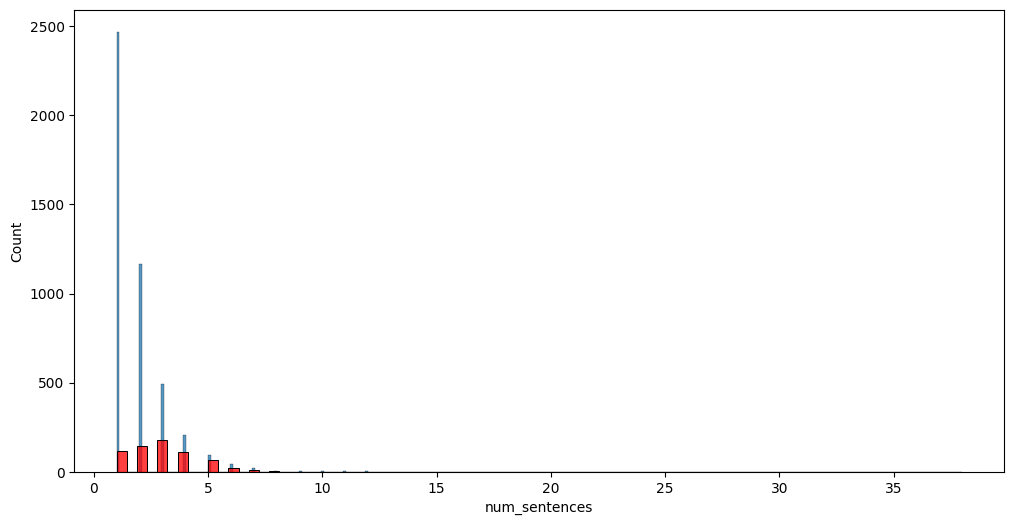

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label'] == 0]['num_sentences'])
sns.histplot(df1[df1['label'] == 1]['num_sentences'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

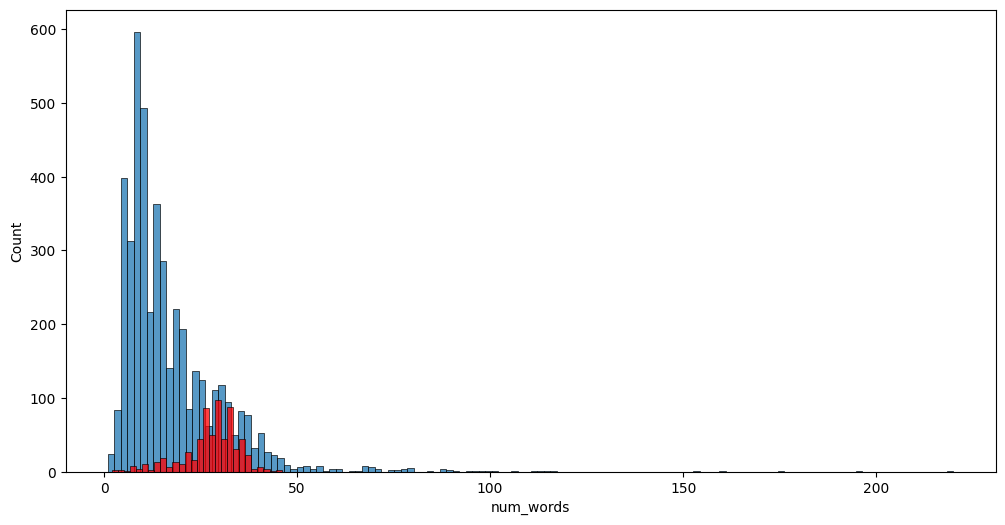

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label'] == 0]['num_words'])
sns.histplot(df1[df1['label'] == 1]['num_words'],color = 'red')

# spam start from 0 
# ham start from approx 25
# so not the big different
# no. of ham and spam ke base pe hm ni bta pa rhe hai ki spam ke words jada hai ya spam ke jada hai.


In [40]:
# num_characters are more in Spam messages
# num_characters are less in Ham messages

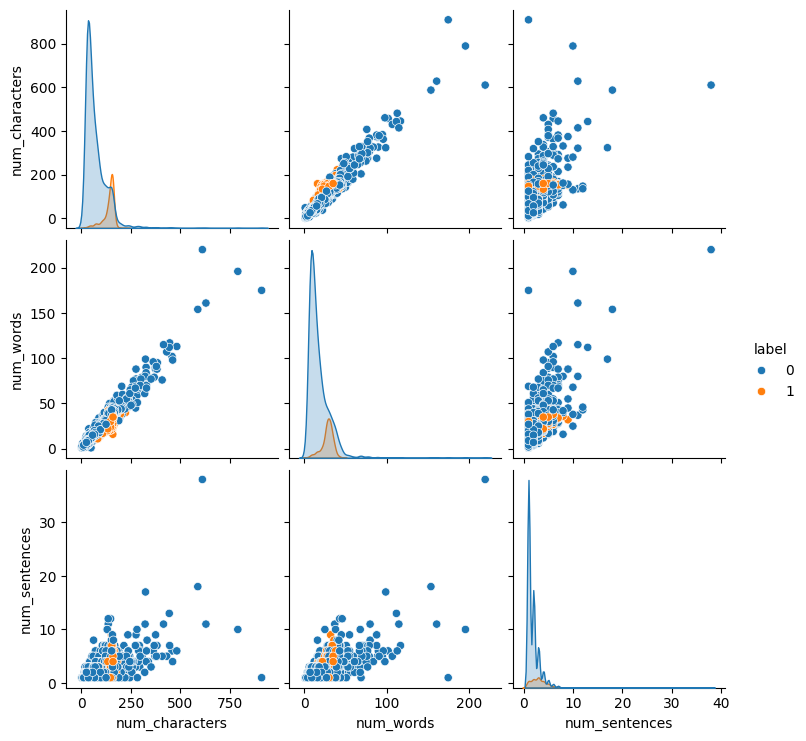

In [41]:
sns.pairplot(df1,hue='label')

In [42]:
# min aur max ke bich me bhut jada diff hai it means outlier is present

In [43]:
df2 = df1.drop(columns=['message'])
df2

,label,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,160,35,4
5568,0,36,9,1
5569,0,57,15,2
5570,0,125,27,1


In [44]:
df2.corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.379777,0.260168,0.263826
num_characters,0.379777,1.000000,0.966002,0.622566
num_words,0.260168,0.966002,1.000000,0.679142
num_sentences,0.263826,0.622566,0.679142,1.000000


<Axes: >

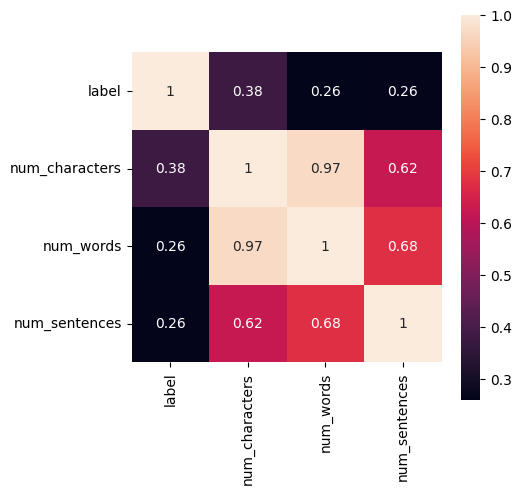

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(),annot=True,square=True)

In [46]:
# The full forms of AM and PM are:

# AM: Ante Meridiem (Latin for "before midday")
# PM: Post Meridiem (Latin for "after midday")

# 3. Data Preprocessing

In [47]:
# 1. Lower case
# 2. Tokenization
# 3. Remove the characters
# 4. Removing stop words and punctuations
# 5. Stemming 

In [48]:
from nltk.corpus import stopwords

In [49]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [51]:
def transform_text(text):
    text = text.lower()
    
    # Tokenize text
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:] 
    y.clear()   

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()   

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
df1['message'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object

In [54]:
df1.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
df1['transformed_message']=df1['message'].apply(transform_text)

In [56]:
df1.head()

,label,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# word cloud for ham

In [125]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from wordcloud import WordCloud

In [59]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [60]:
spam_wc=wc.generate(df1[df1['label']==1]['transformed_message'].str.cat(sep=" "))

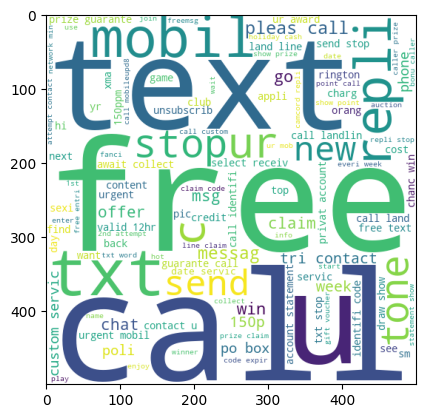

In [61]:
plt.imshow(spam_wc)

In [64]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [65]:
spam_wc=wc.generate(df1[df1['label']==0]['transformed_message'].str.cat(sep=" "))

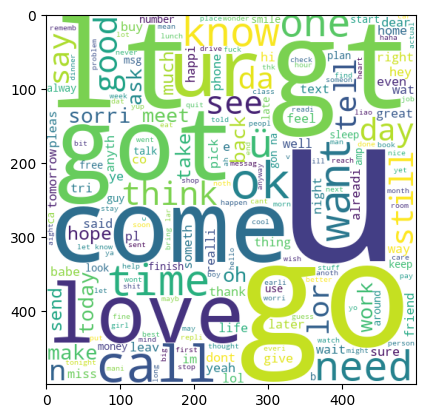

In [66]:
plt.imshow(spam_wc)

In [67]:
df1[df1['label']==1]['transformed_message'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [69]:
spam_corpus = []
for msg in df1[df1['label']==1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [70]:
len(spam_corpus)

9982

In [71]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 120,
         'ur': 119,
         'mobil': 114,
         'stop': 108,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 61,
         'urgent': 58,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'guarante': 43,
         'custom': 42,
         'messag': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'go': 33,
         'offer': 33,
         'line': 33,
         'want': 32,
         'receiv': 3

In [72]:
#  Now creating the dataframe of the frequency

In [75]:
# Adding in Dataframe
from collections import Counter
df3 = pd.DataFrame(Counter(spam_corpus).most_common(30))
df3

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


In [77]:
df3 = df3.rename(columns={0:'Word',1:'Count'})
df3

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


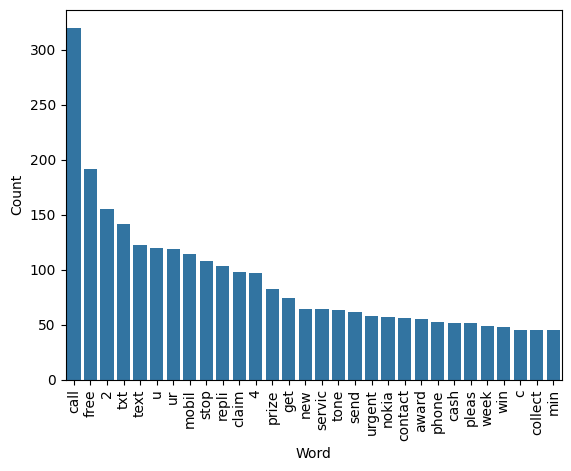

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Word',y='Count',data = df3)
plt.xticks(rotation='vertical')
plt.show()

In [1]:
# spacy 
# nltk
# regex


# data preprocessing
# stopword, punctuation, tokens, 



# feature extraction 
# ohe,
# cv and bow,
# tfidf,
# n grams

# models
# naive bayes, 

In [ ]:
spacy
token, sw, punc, ner, noun_chunks, displacy, lemmatization, stemming,
rule based matcher, phrasee mather, emoji, pos, course grain 